<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sentiment-Analyse-der-Entscheidungsgründe" data-toc-modified-id="Sentiment-Analyse-der-Entscheidungsgründe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sentiment Analyse der Entscheidungsgründe</a></span><ul class="toc-item"><li><span><a href="#Datenvorbereitung" data-toc-modified-id="Datenvorbereitung-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Datenvorbereitung</a></span></li><li><span><a href="#Sentiment-Analyse" data-toc-modified-id="Sentiment-Analyse-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sentiment Analyse</a></span></li><li><span><a href="#Visualisierung" data-toc-modified-id="Visualisierung-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualisierung</a></span></li></ul></li><li><span><a href="#Sentiment-Analyse-der-Verbesserungsvorschläge" data-toc-modified-id="Sentiment-Analyse-der-Verbesserungsvorschläge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sentiment Analyse der Verbesserungsvorschläge</a></span><ul class="toc-item"><li><span><a href="#Datenvorbereitung" data-toc-modified-id="Datenvorbereitung-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Datenvorbereitung</a></span></li><li><span><a href="#Sentiment-Analyse" data-toc-modified-id="Sentiment-Analyse-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sentiment Analyse</a></span></li><li><span><a href="#Visualisierung" data-toc-modified-id="Visualisierung-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualisierung</a></span></li></ul></li></ul></div>

Hilfsfunktionen & Einstellungen

In [43]:
# for pretty printing
import pprint as pp

# IPython (Jupyter) setting: 
# Print out every value instead of just "last_expr" (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Sentiment Analyse der Entscheidungsgründe

## Datenvorbereitung

In [44]:
import sqlite3
import pandas as pd
import os.path

dbPath = "database/bachelor_umfrage.db"

def get_sentiment_reason_data(table_name="sentiment"):
    df = pd.DataFrame()
    if os.path.isfile(dbPath):
        conn = sqlite3.connect(dbPath)
        sql = "SELECT MINTFach, Gründe FROM " + table_name
        sql += " WHERE Gründe IS NOT NULL"
        df = pd.read_sql_query(sql, conn)
    else:
        print("Datenbank oder Tabelle konnte nicht gefunden werden.")
    return df

reason_df = get_sentiment_reason_data(table_name="sentiment")
reason_df.sample(5)

,MINTFach,Gründe
217,nein,"Mein Wunsch war es, Menschen in Problemlagen a..."
421,ja,Aus Interesse an der Werkstoffkunde und Entsch...
82,ja,"Technisches Interesse, Praxisnähe"
14,ja,Chemie war mein Lieblingsfach in der Schule. I...
444,ja,Fachliches Interesse bereits in der Schule. In...


## Sentiment Analyse

In [45]:
from textblob_de import TextBlobDE

def get_sentiment_polarity(text):
    blob = TextBlobDE(text)

    for sentence in blob.sentences:
        return sentence.sentiment.polarity

In [46]:
polarity_list = []

for i, row in reason_df.iterrows():
    polarity = get_sentiment_polarity(row["Gründe"])
    polarity_list.append(polarity)
    
reason_df["polarity"] = polarity_list

In [47]:
def label_polarity (row):
    if row['polarity'] > 0.5 :
        return 'very positive'
    elif row['polarity'] < 0.5 and row['polarity'] > 0 :
        return 'positive'
    elif row['polarity'] > -0.5 and row['polarity'] < 0 :
        return 'negative'
    elif row['polarity'] < -0.5 :
        return 'very negative'
    else:
        return 'neutral'

reason_df['sentiment'] = reason_df.apply(label_polarity, axis=1)
reason_df.sample(5)

,MINTFach,Gründe,polarity,sentiment
268,ja,Ich konnte Mathe und Informatik weshalb der St...,0.00,neutral
133,ja,Ich wollte mein Wissen im Bereich Werkstoffe v...,0.00,neutral
120,ja,"Wichtig für die Zukunft (Klima, Ressourcenknap...",0.85,very positive
420,ja,"Interesse an Informatik in der Schule, Lust me...",0.00,neutral
101,nein,Ich hab es nie in Erwägung gezogen,-0.70,very negative


Negativster & Positivster Sentiment

In [48]:
reason_df[reason_df.polarity == reason_df.polarity.max()].sample(5)
reason_df[reason_df.polarity == reason_df.polarity.min()].sample(5)

,MINTFach,Gründe,polarity,sentiment
294,ja,Da ich Kenntnisse über den Beruf bereits durch...,1.0,very positive
111,ja,Allgemeines Interesse in Technik und Naturwiss...,1.0,very positive
175,ja,Ich mochte schon immer die Naturwissenschaften...,1.0,very positive
220,nein,Für mich stand es außer Frage niemals ein MINT...,1.0,very positive
412,ja,Die Kombination aus Wirtschaft und Informatik ...,1.0,very positive


,MINTFach,Gründe,polarity,sentiment
155,nein,Da ich keinerlei Talent für naturwissenschaftl...,-1.0,very negative
17,ja,"Erststudium Geisteswissenschaften, zwar mit Be...",-1.0,very negative
399,nein,Ich war schlecht in den meisten Milz Fächern.,-1.0,very negative
344,ja,Ich habe bereits in sehr vielen verschiedenen ...,-1.0,very negative
350,nein,"Nein, immer schon schlecht in Mathe und Physik...",-1.0,very negative


## Visualisierung

In [49]:
#calculate average
polarity_sum = reason_df["polarity"].sum()
length = len(reason_df.index)
average = polarity_sum / length
average

0.2530820105820106

sentiment
negative          19
neutral          265
positive          26
very negative     27
very positive    167
Name: sentiment, dtype: int64

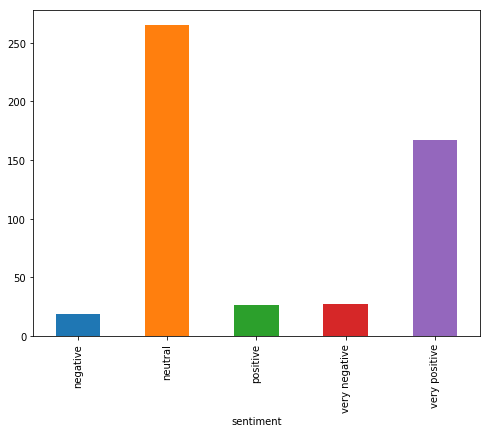

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
reason_df.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
reason_df.groupby("sentiment")["sentiment"].count()

In [51]:
#calculate average of mint
mint = reason_df[reason_df['MINTFach'] == "ja"]
pol_sum_mint = mint["polarity"].sum()
length = len(mint.index)
length
average_mint = pol_sum / length
average_mint

287

0.44443670150987225

sentiment
neutral          162
positive          10
very negative      2
very positive    113
Name: sentiment, dtype: int64

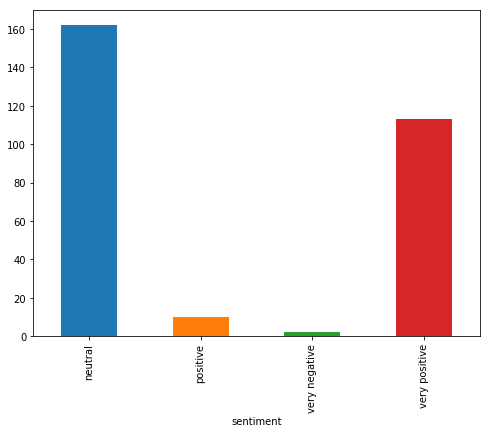

In [52]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
mint.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
mint.groupby("sentiment")["sentiment"].count()

In [53]:
#calculate average of non mint
none_mint = reason_df[reason_df['MINTFach'] == "nein"]
pol_sum_none_mint = none_mint["polarity"].sum()
length = len(none_mint.index)
length
average_none_mint = pol_sum / length
average_none_mint

217

0.5878033794162826

sentiment
negative          19
neutral          103
positive          16
very negative     25
very positive     54
Name: sentiment, dtype: int64

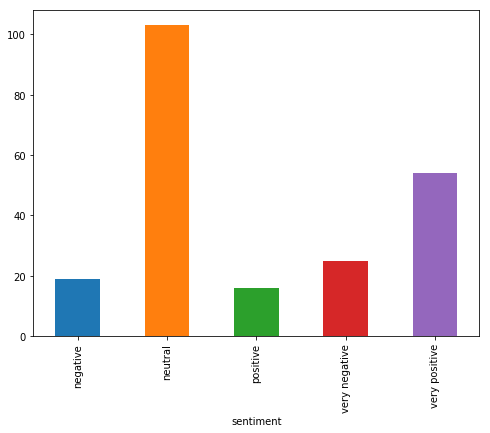

In [54]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
none_mint.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
none_mint.groupby("sentiment")["sentiment"].count()

# Sentiment Analyse der Verbesserungsvorschläge

## Datenvorbereitung

In [55]:
import sqlite3
import pandas as pd
import os.path

dbPath = "database/bachelor_umfrage.db"

def get_sentiment_suggestion_data(table_name="sentiment"):
    df = pd.DataFrame()
    if os.path.isfile(dbPath):
        conn = sqlite3.connect(dbPath)
        sql = "SELECT MINTFach, Verbesserungsvorschläge FROM " + table_name
        sql += " WHERE Verbesserungsvorschläge IS NOT NULL"
        df = pd.read_sql_query(sql, conn)
    else:
        print("Datenbank oder Tabelle konnte nicht gefunden werden.")
    return df

suggestion_df = get_sentiment_suggestion_data(table_name="sentiment")
suggestion_df.sample(5)

,MINTFach,Verbesserungsvorschläge
207,ja,"Es wäre doch schön, wenn wir MINT-Fächer anbie..."
177,ja,"Mehr Praxisbeispiele, bzw. die Berufe genauer ..."
11,ja,Mehr Praxis in der Schule etablieren
175,nein,"zugänglicher machen, Gefühl der Abgehobenheit ..."
144,nein,mehr praxisnahe Beispiele


## Sentiment Analyse

In [56]:
from textblob_de import TextBlobDE

def get_sentiment_polarity(text):
    blob = TextBlobDE(text)

    for sentence in blob.sentences:
        return sentence.sentiment.polarity

In [57]:
polarity_list = []

for i, row in suggestion_df.iterrows():
    polarity = get_sentiment_polarity(row["Verbesserungsvorschläge"])
    polarity_list.append(polarity)
    
suggestion_df["polarity"] = polarity_list

In [58]:
suggestion_df['sentiment'] = suggestion_df.apply(label_polarity, axis=1)
suggestion_df.sample(5)

,MINTFach,Verbesserungsvorschläge,polarity,sentiment
279,nein,"naja.Die Schule sollte jedem Kind,dass MINT-Fä...",0.0,neutral
39,ja,Ordentliche Aufklärung in der Schule über Stud...,0.5,neutral
287,nein,"keine Vorschläge, die Fächer haben mich einfac...",-1.0,very negative
214,nein,Wäre es möglich altruistische/soziale Elemente...,0.7,very positive
339,nein,"Das ist eine schwierige Frage. Ich denke aber,...",-0.7,very negative


Negativster & Positivster Sentiment

In [59]:
suggestion_df[suggestion_df.polarity == suggestion_df.polarity.max()].sample(5)
suggestion_df[suggestion_df.polarity == suggestion_df.polarity.min()].sample(5)

,MINTFach,Verbesserungsvorschläge,polarity,sentiment
237,ja,kompetentere Professoren und mehr praktische Ü...,1.0,very positive
178,ja,"Bessere Lehrer, die für MINT begeistern können...",1.0,very positive
85,nein,Schon in der Schule die Fächer attraktiver ges...,1.0,very positive
105,nein,Mehr praktische Erfahrungen sammeln. Zb in Ele...,1.0,very positive
189,ja,Beispiele von erfolgreichen Frauen usw aufzeigen,1.0,very positive


,MINTFach,Verbesserungsvorschläge,polarity,sentiment
282,ja,"Auf keinen Fall das Niveau herabsetzen, da hat...",-1.0,very negative
332,nein,"Da ich keins dieser Fächer studiere, kann ich ...",-1.0,very negative
353,ja,Einer der wichtigsten Punkte ist es meiner Mei...,-1.0,very negative
48,nein,"Ich finde es schade, dass die Fächer in der Sc...",-1.0,very negative
68,ja,Naturwissenschaften dürfen nicht als 'langweil...,-1.0,very negative


## Visualisierung

In [60]:
#calculate average
polarity_sum = suggestion_df["polarity"].sum()
length = len(reason_df.index)
average = polarity_sum / length
average

0.11119543650793652

sentiment
negative           4
neutral          248
positive          20
very negative     19
very positive     75
Name: sentiment, dtype: int64

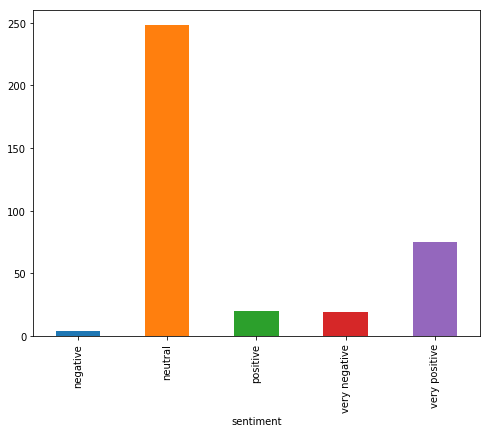

In [61]:
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
suggestion_df.groupby("sentiment")["sentiment"].count().plot.bar(ylim=0);
suggestion_df.groupby("sentiment")["sentiment"].count()